# Chương 1: Review kiến thức liên quan

**Giáo trình:** Phân tích dữ liệu đa biến ứng dụng trong kinh tế, tài chính và kinh doanh

---

## 1.1. Dẫn nhập: Tại sao Phân tích Đa biến cần Đại số Tuyến tính?

Trong kinh tế và tài chính, chúng ta hiếm khi xem xét một biến số đứng độc lập. Thế giới thực là đa chiều và có tính tương tác.

### Case Study: Danh mục đầu tư (Portfolio)
Hãy tưởng tượng bạn là một nhà quản lý quỹ. Bạn không chỉ quan tâm đến lợi suất của một cổ phiếu Vinamilk (VNM) duy nhất, mà bạn nắm giữ một danh mục gồm 3 mã: **VNM**, **VCB** (Vietcombank), và **FPT**. Bạn theo dõi biến động giá của chúng trong 100 ngày giao dịch.

Nếu viết theo cách thông thường, bạn sẽ có 3 cột dữ liệu dài dằng dặc. Nhưng trong tư duy của Khoa học dữ liệu, chúng ta nhìn nhận tập dữ liệu này là một **Ma trận (Matrix)**.

Việc chuyển đổi tư duy từ "con số đơn lẻ" (scalar) sang "ma trận" (matrix) giúp chúng ta:
1.  **Lưu trữ gọn gàng:** Biểu diễn hàng triệu điểm dữ liệu chỉ bằng một ký hiệu $X$.
2.  **Tính toán song song:** Máy tính xử lý phép nhân ma trận nhanh hơn nhiều so với vòng lặp.
3.  **Khám phá cấu trúc:** Các khái niệm như *giá trị riêng* giúp nhìn thấu cấu trúc ngầm của thị trường.

## 1.2. Ma trận và Vectơ trong Dữ liệu

### 1.2.1. Ma trận dữ liệu (The Data Matrix)

Trong phân tích đa biến, một bộ dữ liệu thường được biểu diễn dưới dạng ma trận $X$ kích thước $n \times p$.

$$
X = \begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1p} \\
x_{21} & x_{22} & \dots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \dots & x_{np}
\end{bmatrix}
$$

Trong đó:
* $n$: Số lượng quan sát (observations) - Ví dụ: 100 ngày giao dịch.
* $p$: Số lượng biến (variables) - Ví dụ: 3 mã cổ phiếu.
* Mỗi hàng (row) là một vectơ quan sát $x_i'$.
* Mỗi cột (column) là một vectơ biến $x_j$.

In [16]:
import numpy as np

# Ví dụ: Tạo một ma trận dữ liệu giả lập (5 ngày, 3 mã cổ phiếu)
# Giả sử đây là % lợi nhuận hàng ngày
X = np.array([
    [1.5, 2.0, 0.5],
    [0.8, 1.2, -0.1],
    [-0.5, -0.2, 1.0],
    [2.1, 1.8, 0.2],
    [0.0, 0.5, 0.1]
])

print("Ma trận dữ liệu X (n=5, p=3):")
print(X)

Ma trận dữ liệu X (n=5, p=3):
[[ 1.5  2.   0.5]
 [ 0.8  1.2 -0.1]
 [-0.5 -0.2  1. ]
 [ 2.1  1.8  0.2]
 [ 0.   0.5  0.1]]


### 1.2.2. Các phép toán cơ bản và Ý nghĩa kinh tế

**a. Chuyển vị (Transpose - $X^T$):**
Là phép lật ma trận qua đường chéo chính.

**b. Ma trận Nghịch đảo (Inverse - $X^{-1}$):**
Một ma trận vuông $A$ có nghịch đảo $A^{-1}$ nếu $A A^{-1} = I$ (Ma trận đơn vị). Trong hồi quy tuyến tính, nghịch đảo dùng để tính hệ số beta: $\hat{\beta} = (X^T X)^{-1} X^T y$.

In [17]:
# Tính ma trận chuyển vị
X_T = X.T
print("Ma trận chuyển vị X^T:\n", X_T)

# Tính X^T nhân X (Thường dùng để tính hiệp phương sai)
XT_X = X_T @ X  # Ký hiệu @ là phép nhân ma trận trong Python
print("\nKết quả phép nhân X^T * X (Ma trận vuông 3x3):\n", XT_X)

# Thử tính nghịch đảo của (X^T * X)
try:
    XT_X_inv = np.linalg.inv(XT_X)
    print("\nMa trận nghịch đảo của (X^T * X):\n", XT_X_inv)
except np.linalg.LinAlgError:
    print("\nMa trận không có nghịch đảo (Định thức = 0)")

Ma trận chuyển vị X^T:
 [[ 1.5  0.8 -0.5  2.1  0. ]
 [ 2.   1.2 -0.2  1.8  0.5]
 [ 0.5 -0.1  1.   0.2  0.1]]

Kết quả phép nhân X^T * X (Ma trận vuông 3x3):
 [[7.55 7.84 0.59]
 [7.84 8.97 1.09]
 [0.59 1.09 1.31]]

Ma trận nghịch đảo của (X^T * X):
 [[ 1.70666072 -1.55553886  0.5256546 ]
 [-1.55553886  1.54182107 -0.58230309]
 [ 0.5256546  -0.58230309  1.0111253 ]]


## 1.3. Giá trị riêng và Vectơ riêng (Eigenvalues & Eigenvectors)

Đây là khái niệm quan trọng nhất cho PCA (Chương 6). Hãy tưởng tượng đám mây dữ liệu như một quả bóng bầu dục.

* **Vectơ riêng ($v$):** Chỉ ra **hướng** trục chính của quả bóng (nơi dữ liệu phân tán mạnh nhất).
* **Giá trị riêng ($\lambda$):** Độ dài của trục đó, đại diện cho **lượng thông tin** (phương sai) mà trục đó chứa.

Công thức: $A v = \lambda v$

In [18]:
# Tính giá trị riêng và vectơ riêng của ma trận vuông (XT_X)
eigenvalues, eigenvectors = np.linalg.eig(XT_X)

print("Các Giá trị riêng (Eigenvalues) - Đại diện cho lượng thông tin:")
for val in eigenvalues:
    print(f"{val:.4f}")

print("\nCác Vectơ riêng (Eigenvectors) - Đại diện cho hướng:")
print(eigenvectors)

# Giải thích: Giá trị riêng lớn nhất tương ứng với hướng biến thiên mạnh nhất của dữ liệu.

Các Giá trị riêng (Eigenvalues) - Đại diện cho lượng thông tin:
16.2291
0.2912
1.3098

Các Vectơ riêng (Eigenvectors) - Đại diện cho hướng:
[[ 0.67116     0.68664635 -0.27939406]
 [ 0.73694146 -0.65886938  0.15102458]
 [ 0.08038371  0.30725872  0.94822494]]


## 1.4. Cơ sở Thống kê Đa biến

Khi chuyển từ thống kê đơn biến (Univariate) sang đa biến (Multivariate), các khái niệm cơ bản sẽ được tổng quát hóa dưới dạng ma trận.

### 1.4.1. Vectơ Kỳ vọng (Mean Vector)
Thay vì một giá trị trung bình $\mu$, chúng ta có một vectơ chứa các trung bình của từng biến:
$$
\bar{x} = \begin{bmatrix} \bar{x}_1 \\ \bar{x}_2 \\ \vdots \\ \bar{x}_p \end{bmatrix}
$$
*Ý nghĩa kinh doanh:* Đây là "chân dung khách hàng trung bình" hoặc "mức sinh lời trung bình" của danh mục.

### 1.4.2. Ma trận Hiệp phương sai (Covariance Matrix - $\Sigma$)
Đây là ma trận vuông đối xứng ($p \times p$) mô tả độ biến thiên và mối quan hệ giữa các biến.

$$
\Sigma = \begin{bmatrix}
\sigma_{1}^2 & \sigma_{12} & \dots & \sigma_{1p} \\
\sigma_{21} & \sigma_{2}^2 & \dots & \sigma_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{p1} & \sigma_{p2} & \dots & \sigma_{p}^2
\end{bmatrix}
$$

* **Đường chéo chính (Diagonal):** Chứa phương sai (Variance $\sigma^2$) của từng biến. Đo lường độ rủi ro riêng lẻ.
* **Ngoài đường chéo (Off-diagonal):** Chứa hiệp phương sai (Covariance $\sigma_{ij}$). Nếu $\sigma_{ij} > 0$, hai biến cùng tăng/giảm (ví dụ: Giá dầu và Giá cổ phiếu năng lượng). Nếu $\sigma_{ij} < 0$, chúng biến động ngược chiều.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# 1. Giả lập dữ liệu: 2 biến có tương quan dương (Thu nhập & Chi tiêu)
# Mean vector (Thu nhập=10, Chi tiêu=8)
mean = [10, 8]
# Covariance matrix (Phương sai mỗi biến là 2, Hiệp phương sai là 1.5 -> Tương quan cao)
cov = [[2, 1.5], 
       [1.5, 2]] 

# Tạo 500 điểm dữ liệu
data = np.random.multivariate_normal(mean, cov, 500)

# Tính toán lại từ dữ liệu mẫu để kiểm chứng
mean_sample = np.mean(data, axis=0)
cov_sample = np.cov(data, rowvar=False)

print(f"Vectơ trung bình mẫu:\n {mean_sample}")
print(f"\nMa trận hiệp phương sai mẫu:\n {cov_sample}")

Vectơ trung bình mẫu:
 [9.95409207 7.9787653 ]

Ma trận hiệp phương sai mẫu:
 [[1.98591126 1.61714748]
 [1.61714748 2.24029892]]


## 1.5. Đo lường Khoảng cách (Distance Measures)

Trong phân tích dữ liệu (đặc biệt là Phân cụm và Tìm Outlier), câu hỏi quan trọng nhất là: *"Điểm A cách điểm B bao xa?"* hoặc *"Khách hàng này có dị biệt so với đám đông không?"*.

### 1.5.1. Khoảng cách Euclidean (Khoảng cách chim bay)
Là khoảng cách hình học thông thường:
$$ d(x, y) = \sqrt{(x - y)^T (x - y)} = \sqrt{\sum (x_i - y_i)^2} $$
**Hạn chế:** Euclidean giả định các biến độc lập và có cùng đơn vị đo. Trong kinh tế, điều này hiếm khi xảy ra (ví dụ: Tuổi đơn vị là năm, Thu nhập đơn vị là triệu đồng).

### 1.5.2. Khoảng cách Mahalanobis (Quan trọng)
Đây là thước đo khoảng cách có tính đến **sự tương quan** và **độ biến thiên** của dữ liệu. Nó sử dụng ma trận nghịch đảo của hiệp phương sai ($\Sigma^{-1}$) làm trọng số.

Công thức tính khoảng cách từ một điểm $x$ đến trung tâm $\mu$:
$$
 D^2 = (x - \mu)^T \Sigma^{-1} (x - \mu)
$$

**Ý nghĩa:**
* Mahalanobis chuẩn hóa dữ liệu trước khi tính khoảng cách.
* Nó giúp phát hiện các điểm dữ liệu "trông có vẻ bình thường" nếu xét từng biến đơn lẻ, nhưng lại "bất thường" khi xét sự kết hợp (Ví dụ: Một người Thu nhập thấp nhưng Chi tiêu thẻ tín dụng rất cao -> Outlier theo Mahalanobis).

In [20]:
from scipy.spatial import distance

# Giả sử ta có 2 điểm quan sát mới
# Point A: Gần trung tâm (Bình thường)
point_A = [10.5, 8.5]
# Point B: Thu nhập cao (14) nhưng Chi tiêu thấp (6) -> Rất lạ vì 2 biến này thường tăng cùng nhau
point_B = [14, 6]

# 1. Tính khoảng cách Euclidean (So với trung bình [10, 8])
dist_euclid_A = distance.euclidean(point_A, mean)
dist_euclid_B = distance.euclidean(point_B, mean)

# 2. Tính khoảng cách Mahalanobis
# Cần ma trận nghịch đảo của Covariance (VI)
VI = np.linalg.inv(cov_sample)

dist_maha_A = distance.mahalanobis(point_A, mean_sample, VI)
dist_maha_B = distance.mahalanobis(point_B, mean_sample, VI)

print(f"Điểm A - Euclidean: {dist_euclid_A:.2f}, Mahalanobis: {dist_maha_A:.2f}")
print(f"Điểm B - Euclidean: {dist_euclid_B:.2f}, Mahalanobis: {dist_maha_B:.2f}")

# KẾT LUẬN:
# Điểm B có khoảng cách Euclidean không quá lớn, nhưng Mahalanobis rất lớn 
# -> B là một Outlier đa biến (Multivariate Outlier).

Điểm A - Euclidean: 0.71, Mahalanobis: 0.40
Điểm B - Euclidean: 4.47, Mahalanobis: 6.19


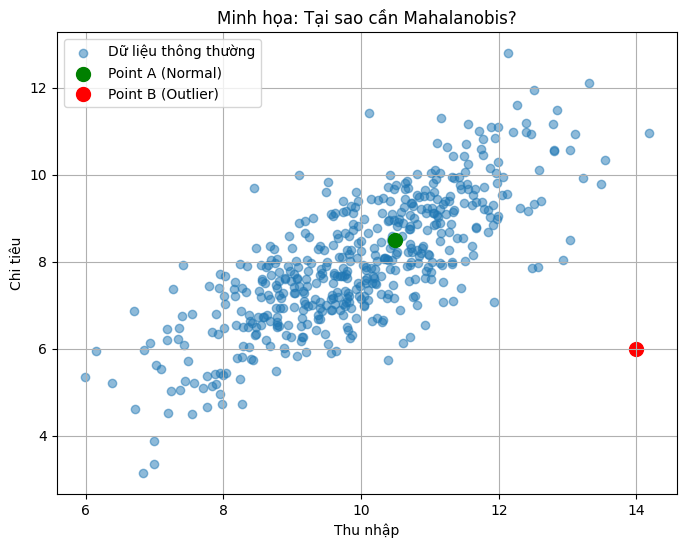

In [21]:
# Trực quan hóa để thấy rõ sự khác biệt
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Dữ liệu thông thường')
plt.scatter(point_A[0], point_A[1], color='green', s=100, label='Point A (Normal)')
plt.scatter(point_B[0], point_B[1], color='red', s=100, label='Point B (Outlier)')

plt.xlabel('Thu nhập')
plt.ylabel('Chi tiêu')
plt.title('Minh họa: Tại sao cần Mahalanobis?')
plt.legend()
plt.grid(True)
plt.show()

## 1.6. Phân phối Chuẩn Đa biến (Multivariate Normal Distribution)

Hầu hết các kỹ thuật phân tích đa biến (như Hồi quy, MANOVA, Phân tích nhân tố) đều dựa trên giả định rằng dữ liệu tuân theo phân phối chuẩn đa biến.

Nếu phân phối chuẩn đơn biến có hình dạng "cái chuông" (Bell curve), thì phân phối chuẩn đa biến có hình dạng cái chuông úp trong không gian 3 chiều (hoặc siêu chuông trong không gian n-chiều).

Hàm mật độ xác suất được định nghĩa bởi:
$$ f(x) = \frac{1}{(2\pi)^{p/2} |\Sigma|^{1/2}} e^{-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)} $$

*Lưu ý:* Phần mũ $ (x - \mu)^T \Sigma^{-1} (x - \mu) $ chính là bình phương khoảng cách Mahalanobis ($D^2$). Điều này có nghĩa là các điểm có cùng mật độ xác suất sẽ nằm trên cùng một hình elip (trong 2D) hoặc ellipsoid (trong 3D).

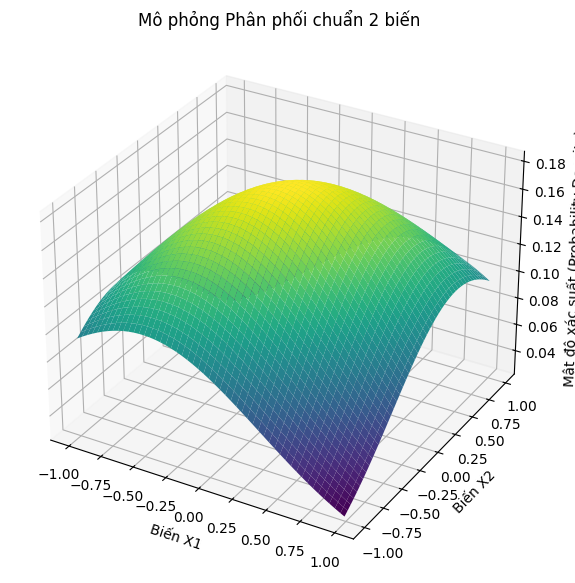

In [22]:
# Trực quan hóa Phân phối chuẩn 2 biến (Bivariate Normal Distribution)
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Tạo lưới điểm (grid) để vẽ bề mặt
x, y = np.mgrid[-1:1:.01, -1:1:.01]
pos = np.dstack((x, y))

# Khởi tạo biến ngẫu nhiên chuẩn đa biến
# Mean = [0, 0], Covariance = [[1, 0.5], [0.5, 1]]
rv = multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]])

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, rv.pdf(pos), cmap='viridis', linewidth=0)

ax.set_title('Mô phỏng Phân phối chuẩn 2 biến')
ax.set_xlabel('Biến X1')
ax.set_ylabel('Biến X2')
ax.set_zlabel('Mật độ xác suất (Probability Density)')
plt.show()

## 1.7. Tổng kết Chương 1

Chúc mừng bạn đã hoàn thành chương đầu tiên! Mặc dù chứa nhiều công thức toán học, nhưng bạn chỉ cần ghi nhớ 3 "từ khóa" cốt lõi sau đây để áp dụng cho toàn bộ cuốn sách:

1.  **Ma trận (Matrix):** Cách chúng ta nhìn dữ liệu. Mọi bảng tính Excel đều là ma trận. Phép nhân ma trận giúp biến đổi dữ liệu hàng loạt.
2.  **Ma trận Hiệp phương sai (Covariance Matrix $\Sigma$):** Trái tim của phân tích đa biến. Nó cho biết độ biến động của từng biến và sự liên kết giữa chúng.
3.  **Khoảng cách Mahalanobis:** Thước đo sự khác biệt chính xác nhất trong môi trường đa chiều, giúp phát hiện những điểm dữ liệu bất thường (Outliers) mà mắt thường không thấy.

## 1.8. Bài tập thực hành

### Bài tập 1: Lý thuyết
Tại sao khi phân tích rủi ro của một danh mục đầu tư, ta không thể chỉ tính phương sai của từng cổ phiếu riêng lẻ mà phải tính cả hiệp phương sai giữa chúng? Hãy giải thích dựa trên công thức biến động của danh mục.

### Bài tập 2: Thực hành với Python
Sử dụng bộ dữ liệu hoa Iris (có sẵn trong thư viện `scikit-learn`), hãy thực hiện các bước sau:
1. Load dữ liệu (gồm 4 biến: dài đài, rộng đài, dài cánh, rộng cánh).
2. Tính Vectơ trung bình và Ma trận hiệp phương sai của 4 biến này.
3. Tính khoảng cách Mahalanobis từ mẫu đầu tiên (row 0) đến tâm của dữ liệu.

In [23]:
# Gợi ý giải Bài tập 2
from sklearn.datasets import load_iris
import pandas as pd

# 1. Load dữ liệu
iris = load_iris()
X_iris = iris.data
feature_names = iris.feature_names

# Chuyển thành DataFrame cho dễ nhìn
df_iris = pd.DataFrame(X_iris, columns=feature_names)
print("5 dòng đầu của dữ liệu Iris:")
print(df_iris.head())

# 2. Tính Mean vector & Covariance Matrix
mean_vec = np.mean(X_iris, axis=0)
cov_mat = np.cov(X_iris, rowvar=False)

print("\nVectơ trung bình (4 biến):", mean_vec)
print("\nMa trận hiệp phương sai (4x4):\n", cov_mat)

# 3. Tính khoảng cách Mahalanobis cho dòng đầu tiên
# Bạn hãy tự viết code tính khoảng cách này dựa trên công thức ở phần 1.5 nhé!
# Gợi ý: Dùng scipy.spatial.distance.mahalanobis

5 dòng đầu của dữ liệu Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Vectơ trung bình (4 biến): [5.84333333 3.05733333 3.758      1.19933333]

Ma trận hiệp phương sai (4x4):
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
